In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import math
import datetime as dt
import numpy as np
from bokeh.plotting import show
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stat

sns.set_theme(style="whitegrid")
pd.set_option("display.max_columns", None)

In [2]:
loc = 'https://raw.githubusercontent.com/sagi778/UFC_Card_Predictor/main/'

file = 'raw_fighter_details.csv'

In [3]:
df = pd.read_csv(loc+file)

# Exploratory Data Analysis

In [4]:
df.head()

,fighter_name,Height,Weight,Reach,Stance,DOB
0,AJ Fonseca,"5' 4""",145 lbs.,NaN,NaN,NaN
1,AJ Matthews,"5' 11""",185 lbs.,NaN,NaN,NaN
2,AJ McKee,"5' 10""",145 lbs.,NaN,NaN,NaN
3,AJ Siscoe,"5' 7""",135 lbs.,NaN,NaN,NaN
4,Aalon Cruz,"6' 0""",145 lbs.,NaN,NaN,NaN


In [5]:
df.shape

(3313, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3313 entries, 0 to 3312
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   fighter_name  3313 non-null   object
 1   Height        3050 non-null   object
 2   Weight        3238 non-null   object
 3   Reach         1569 non-null   object
 4   Stance        2439 non-null   object
 5   DOB           2573 non-null   object
dtypes: object(6)
memory usage: 155.4+ KB


# features engineering

In [7]:
df = df.rename(columns = {'fighter_name':'name','Height':'height','Weight':'weight','Reach':'reach','Stance':'stance','DOB':'age'})
df.head(5)

,name,height,weight,reach,stance,age
0,AJ Fonseca,"5' 4""",145 lbs.,NaN,NaN,NaN
1,AJ Matthews,"5' 11""",185 lbs.,NaN,NaN,NaN
2,AJ McKee,"5' 10""",145 lbs.,NaN,NaN,NaN
3,AJ Siscoe,"5' 7""",135 lbs.,NaN,NaN,NaN
4,Aalon Cruz,"6' 0""",145 lbs.,NaN,NaN,NaN


### height > inch to cm

In [8]:
df['height'] = df['height'].apply(lambda x: str(x) )
df['height'] = df['height'].apply(lambda x: '0' if x == 'nan' else str(x))
df['height'] = df['height'].apply(lambda x: 30.48*float(x[0]) if len(x) == 1 else 30.48*float(x[0])+ 2.54*float(x[x.find("'")+1:x.find('"')]) ) 
df.head()

,name,height,weight,reach,stance,age
0,AJ Fonseca,162.56,145 lbs.,NaN,NaN,NaN
1,AJ Matthews,180.34,185 lbs.,NaN,NaN,NaN
2,AJ McKee,177.80,145 lbs.,NaN,NaN,NaN
3,AJ Siscoe,170.18,135 lbs.,NaN,NaN,NaN
4,Aalon Cruz,182.88,145 lbs.,NaN,NaN,NaN


In [9]:
height_list = df['height'][df['height']!=0.0]
mean_height = np.round(np.mean(height_list),2)
df['height'] = df['height'].apply(lambda x: mean_height if x==0.00 else x )

### weight > lbs to kg

In [10]:
df['weight'] = df['weight'].apply(lambda x: 0.45*float(str(x)[0:3]) )
df.head()

,name,height,weight,reach,stance,age
0,AJ Fonseca,162.56,65.25,NaN,NaN,NaN
1,AJ Matthews,180.34,83.25,NaN,NaN,NaN
2,AJ McKee,177.80,65.25,NaN,NaN,NaN
3,AJ Siscoe,170.18,60.75,NaN,NaN,NaN
4,Aalon Cruz,182.88,65.25,NaN,NaN,NaN


In [11]:
mean_weight = np.round( np.mean(df['weight']) )
df['weight'] = df['weight'].apply(lambda x: mean_weight if str(x)=='nan' else x )

### reach > inch to cm

In [12]:
df.reach.unique()

array([nan, '70"', '69"', '78"', '73"', '71"', '76"', '63"', '81"', '74"',
       '72"', '68"', '64"', '77"', '67"', '80"', '66"', '65"', '79"',
       '75"', '82"', '60"', '83"', '61"', '62"', '84"'], dtype=object)

In [13]:
df['reach'] = df['reach'].apply( lambda x: str(x))
df['reach'] = df['reach'].apply( lambda x: '00"' if x=='nan' else x)
df['reach'] = df['reach'].apply( lambda x: float(x[:x.find('"')])*2.54 )

In [14]:
df.tail()

,name,height,weight,reach,stance,age
3308,Zelim Imadaev,182.88,76.50,193.04,Orthodox,"Jan 25, 1995"
3309,Zhang Lipeng,180.34,69.75,180.34,Southpaw,"Mar 10, 1990"
3310,Zoila Frausto,162.56,60.75,0.00,Orthodox,NaN
3311,Zu Anyanwu,185.42,112.95,195.58,Orthodox,"Aug 05, 1981"
3312,Zubaira Tukhugov,172.72,65.25,172.72,Orthodox,"Jan 15, 1991"


#### replacing null values with height:

In [15]:
for i in range(0,len(df)):
    if( df.loc[i,'reach']==0.00 or df.loc[i,'reach']=='nan' ):
        df.loc[i,'reach'] = df.loc[i,'height'] 

In [16]:
df.tail(10)  

,name,height,weight,reach,stance,age
3303,Zak Cummings,182.88,83.25,190.50,Southpaw,"Aug 02, 1984"
3304,Zak Ottow,180.34,76.50,182.88,Orthodox,"Dec 22, 1986"
3305,Zane Frazier,195.58,112.50,195.58,Orthodox,NaN
3306,Zarah Fairn dos Santos,177.80,65.25,177.80,NaN,"Dec 12, 1986"
3307,Zelg Galesic,187.96,83.25,187.96,Orthodox,"Feb 16, 1979"
3308,Zelim Imadaev,182.88,76.50,193.04,Orthodox,"Jan 25, 1995"
3309,Zhang Lipeng,180.34,69.75,180.34,Southpaw,"Mar 10, 1990"
3310,Zoila Frausto,162.56,60.75,162.56,Orthodox,NaN
3311,Zu Anyanwu,185.42,112.95,195.58,Orthodox,"Aug 05, 1981"
3312,Zubaira Tukhugov,172.72,65.25,172.72,Orthodox,"Jan 15, 1991"


### stance

In [17]:
df.stance.unique()

array([nan, 'Orthodox', 'Southpaw', 'Switch', 'Open Stance', 'Sideways'],
      dtype=object)

Most common stance:


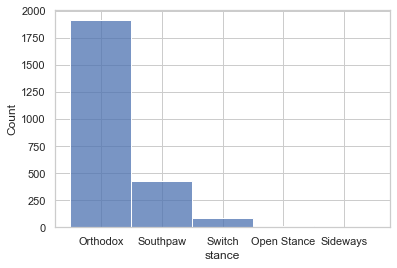

In [18]:
print('Most common stance:')
ax = sns.histplot(x=df["stance"])

#### replacing null with 'Orthodox'(= most common stance)

In [19]:
df['stance'] = df['stance'].apply(lambda x: 'Orthodox' if str(x)=='nan' else x )

### age

In [20]:
df.age.unique()

array([nan, 'Nov 12, 1974', 'Mar 18, 1989', ..., 'Feb 16, 1979',
       'Jan 25, 1995', 'Aug 05, 1981'], dtype=object)

In [21]:
df.age = df.age.apply(lambda x: str(x))
df.age = df.age.apply(lambda x: x[len(x)-4:len(x)])
df.head()

,name,height,weight,reach,stance,age
0,AJ Fonseca,162.56,65.25,162.56,Orthodox,n
1,AJ Matthews,180.34,83.25,180.34,Orthodox,n
2,AJ McKee,177.80,65.25,177.80,Orthodox,n
3,AJ Siscoe,170.18,60.75,170.18,Orthodox,n
4,Aalon Cruz,182.88,65.25,182.88,Orthodox,n


In [22]:
age_list = df.age[df.age!='n']
age_list.unique()

array(['1974', '1989', '1992', '1986', '1980', '1983', '1987', '1985',
       '1991', '1982', '1978', '1984', '1988', '1963', '1981', '1976',
       '1979', '1995', '1977', '1996', '1990', '1993', '1971', '1970',
       '1994', '1975', '1967', '1965', '1972', '1968', '1969', '1964',
       '1973', '1954', '1997', '1999', '1958', '1960', '1966', '1959',
       '1962', '1961', '1998', '1943', '1956'], dtype=object)

Most common age for fighters:


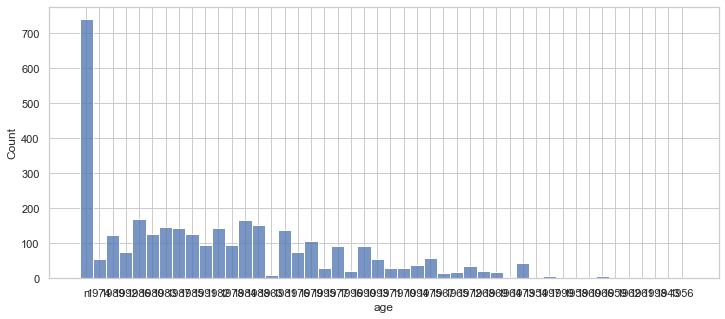

In [23]:
print('Most common age for fighters:')
plt.figure(figsize=(12,5))
ax = sns.histplot(x=df["age"])

#### possible mistake at 1982/40 yo - will fill null with "median"

In [24]:
age_list = age_list.astype(int)
year_of_birth_median = int(np.median(age_list))
year_of_birth_median

1984

#### replacing null with most common age:

In [25]:
from datetime import date,timedelta
current_date = date.today().year

df['age'] = df['age'].apply(lambda x: str(year_of_birth_median) if str(x)=='n' else x )
df['age'] = df['age'].apply(lambda x: current_date - int(x))
df.head()

,name,height,weight,reach,stance,age
0,AJ Fonseca,162.56,65.25,162.56,Orthodox,38
1,AJ Matthews,180.34,83.25,180.34,Orthodox,38
2,AJ McKee,177.80,65.25,177.80,Orthodox,38
3,AJ Siscoe,170.18,60.75,170.18,Orthodox,38
4,Aalon Cruz,182.88,65.25,182.88,Orthodox,38
